In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [159]:
data = pd.read_csv("SHR76_17.csv")

In [160]:
data.shape

(771025, 31)

In [161]:
data.columns

Index(['ID', 'CNTYFIPS', 'Ori', 'State', 'Agency', 'Agentype', 'Source',
       'Solved', 'Year', 'Month', 'Incident', 'ActionType', 'Homicide',
       'Situation', 'VicAge', 'VicSex', 'VicRace', 'VicEthnic', 'OffAge',
       'OffSex', 'OffRace', 'OffEthnic', 'Weapon', 'Relationship',
       'Circumstance', 'Subcircum', 'VicCount', 'OffCount', 'FileDate',
       'fstate', 'MSA'],
      dtype='object')

In [162]:
data["VicSex"].value_counts()

Male       596797
Female     172958
Unknown      1270
Name: VicSex, dtype: int64

In [163]:
pd.crosstab(data["VicSex"], data["OffSex"])

OffSex,Female,Male,Unknown
VicSex,,,
Female,13262,120198,39498
Male,48032,362171,186594
Unknown,72,405,793


In [164]:
pd.crosstab(data["VicSex"], data["OffSex"]).apply(lambda x: (x / x.sum())*100, axis = 1)

OffSex,Female,Male,Unknown
VicSex,,,
Female,7.667757,69.495484,22.836758
Male,8.048298,60.685794,31.265908
Unknown,5.669291,31.889764,62.440945


In [165]:
data.Weapon.value_counts()

Handgun - pistol, revolver, etc         378907
Knife or cutting instrument             114602
Firearm, type not stated                 61243
Personal weapons, includes beating       44740
Other or type unknown                    38961
Shotgun                                  38526
Blunt object - hammer, club, etc         34721
Rifle                                    29175
Strangulation - hanging                   9900
Fire                                      7582
Asphyxiation - includes death by gas      4729
Other gun                                 2879
Narcotics or drugs, sleeping pills        2187
Drowning                                  1475
Explosives                                 603
Poison - does not include gas              543
Pushed or thrown out window                251
Motor Vehicle/Vessel                         1
Name: Weapon, dtype: int64

In [166]:
pd.crosstab(data.Weapon, data.OffSex).sort_values(["Female", "Male"])

OffSex,Female,Male,Unknown
Weapon,,,
Motor Vehicle/Vessel,0,1,0
Pushed or thrown out window,35,182,34
Explosives,35,386,182
Other gun,107,1585,1187
Poison - does not include gas,185,265,93
Strangulation - hanging,475,4887,4538
Drowning,603,603,269
"Narcotics or drugs, sleeping pills",711,1204,272
Fire,1233,3849,2500


In [167]:
dt = pd.crosstab(data.Weapon, data.OffSex).sort_values(["Female", "Male"])

In [168]:
dt/dt.sum(axis = 0) * 100

OffSex,Female,Male,Unknown
Weapon,,,
Motor Vehicle/Vessel,0.000000,0.000207,0.000000
Pushed or thrown out window,0.057035,0.037699,0.014986
Explosives,0.057035,0.079955,0.080217
Other gun,0.174364,0.328311,0.523173
Poison - does not include gas,0.301470,0.054891,0.040990
Strangulation - hanging,0.774044,1.012275,2.000132
Drowning,0.982629,0.124903,0.118562
"Narcotics or drugs, sleeping pills",1.158622,0.249392,0.119885
Fire,2.009256,0.797267,1.101880


In [169]:
data.OffAge.head()

0    55
1    67
2    53
3    35
4    25
Name: OffAge, dtype: int64

(0, 100)

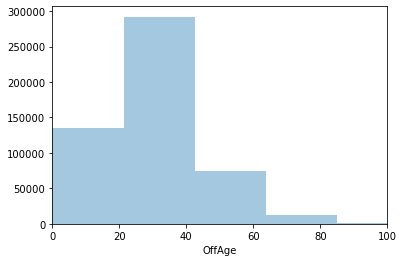

In [170]:
sns.distplot(data.OffAge, kde = False)
plt.xlim([0,100])

(0, 100)

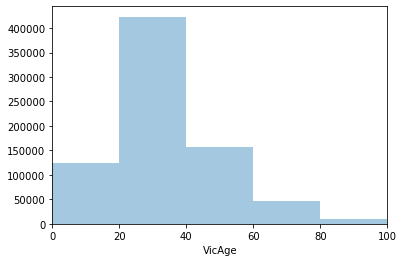

In [171]:
sns.distplot(data.VicAge, kde = False)
plt.xlim([0,100])

In [172]:
data.VicRace.value_counts()

White                                  382714
Black                                  363181
Asian                                   11049
Unknown                                  8373
American Indian or Alaskan Native        5680
Native Hawaiian or Pacific Islander        28
Name: VicRace, dtype: int64

In [173]:
data.OffRace.value_counts()

White                                  264152
Black                                  261713
Unknown                                233914
Asian                                    6763
American Indian or Alaskan Native        4466
Native Hawaiian or Pacific Islander        17
Name: OffRace, dtype: int64

In [174]:
pd.crosstab(data.OffRace, data.VicRace)

VicRace,American Indian or Alaskan Native,Asian,Black,Native Hawaiian or Pacific Islander,Unknown,White
OffRace,,,,,,
American Indian or Alaskan Native,2505,39,235,0,35,1652
Asian,36,4274,651,3,80,1719
Black,501,1423,219257,5,1198,39329
Native Hawaiian or Pacific Islander,0,0,4,8,2,3
Unknown,1200,3375,122299,6,5479,101555
White,1438,1938,20735,6,1579,238456


(0, 100)

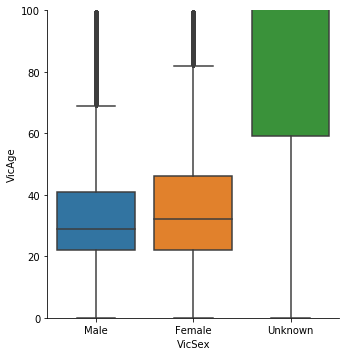

In [175]:
sns.catplot(x = "VicSex", y = "VicAge",kind = "box", data = data)
plt.ylim([0,100])

(0, 100)

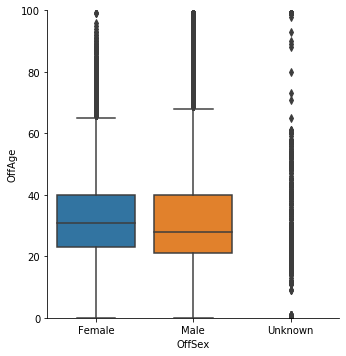

In [176]:
sns.catplot(x = "OffSex", y = "OffAge",kind = "box", data = data)
plt.ylim([0,100])

In [177]:
data.Year.head()

0    1976
1    1976
2    1976
3    1976
4    1976
Name: Year, dtype: int64

In [178]:
data[["Year", "VicSex"]].groupby(by = "Year").count()

,VicSex
Year,
1976,17619
1977,18844
1978,19523
1979,21698
1980,23092
1981,21208
1982,20544
1983,19653
1984,18093


In [179]:
yearly_murder = data[["Year", "VicSex"]].groupby(by = "Year").count()

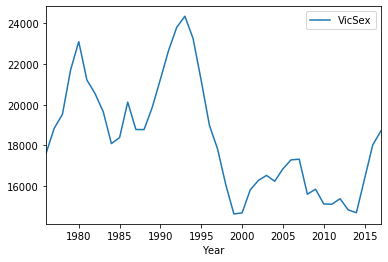

In [180]:
yearly_murder.plot()

In [181]:
data.Relationship.value_counts()

Relationship not determined    292548
Acquaintance                   152783
Stranger                       114907
Other - known to victim         34625
Wife                            28507
Friend                          26755
Girlfriend                      19434
Son                             11987
Husband                         11919
Other family                    11525
Boyfriend                        8911
Daughter                         8886
Neighbor                         8030
Brother                          6762
Father                           5539
Mother                           5254
In-law                           4779
Common-law wife                  3254
Common-law husband               2695
Ex-wife                          2382
Stepfather                       1740
Homosexual relationship          1665
Sister                           1619
Stepson                          1468
Ex-husband                        879
Stepdaughter                      869
Employer    

In [182]:
monthly_murder = data[["Month", "VicSex"]].groupby(by = "Month").count()

In [183]:
monthly_murder

,VicSex
Month,
April,61593
August,69683
December,66925
February,55840
January,63734
July,70578
June,64556
March,62050
May,64536


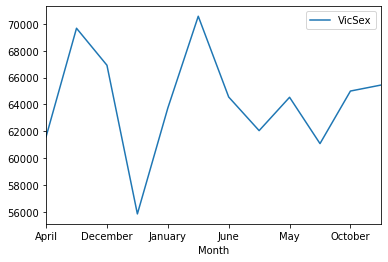

In [184]:
monthly_murder.plot()

In [185]:
weapon_result = data.Weapon.value_counts()
county_result = data.CNTYFIPS.value_counts()

In [186]:
weapon_word2index = {value:i for i,value in enumerate(weapon_result.index)}

In [187]:
weapon_word2index

{'Handgun - pistol, revolver, etc': 0,
 'Knife or cutting instrument': 1,
 'Firearm, type not stated': 2,
 'Personal weapons, includes beating': 3,
 'Other or type unknown': 4,
 'Shotgun': 5,
 'Blunt object - hammer, club, etc': 6,
 'Rifle': 7,
 'Strangulation - hanging': 8,
 'Fire': 9,
 'Asphyxiation - includes death by gas': 10,
 'Other gun': 11,
 'Narcotics or drugs, sleeping pills': 12,
 'Drowning': 13,
 'Explosives': 14,
 'Poison - does not include gas': 15,
 'Pushed or thrown out window': 16,
 'Motor Vehicle/Vessel': 17}

In [188]:
cnty_word2index = {value:i for i,value in enumerate(county_result.index)}

In [189]:
list(cnty_word2index.keys())[:100]

['Los Angeles, CA',
 'New York, NY',
 'Cook, IL',
 'Wayne, MI',
 'Harris, TX',
 'Philadelphia, PA',
 'Dallas, TX',
 'Miami-Dade, FL',
 'Baltimore city, MD',
 'Maricopa, AZ',
 'Orleans, LA',
 'District of Columbia',
 'Fulton, GA',
 'St. Louis city, MO',
 'Shelby, TN',
 'Bexar, TX',
 'San Bernardino, CA',
 'Alameda, CA',
 'Cuyahoga, OH',
 'San Diego, CA',
 'Essex, NJ',
 'Clark, NV',
 'Jackson, MO',
 'Tarrant, TX',
 'Jefferson, AL',
 'Marion, IN',
 'Milwaukee, WI',
 'Riverside, CA',
 'Orange, CA',
 'Franklin, OH',
 "Prince George's, MD",
 'Sacramento, CA',
 'Duval, FL',
 'Broward, FL',
 'San Francisco, CA',
 'Lake, IN',
 'Davidson, TN',
 'Oklahoma, OK',
 'Fresno, CA',
 'Richmond, VA',
 'Allegheny, PA',
 'Suffolk, MA',
 'King, WA',
 'Mecklenburg, NC',
 'Palm Beach, FL',
 'Hillsborough, FL',
 'Contra Costa, CA',
 'East Baton Rouge, LA',
 'Denver, CO',
 'Pima, AZ',
 'Kern, CA',
 'Orange, FL',
 'Hamilton, OH',
 'Jefferson, KY',
 'San Joaquin, CA',
 'De Kalb, GA',
 'Santa Clara, CA',
 'Pulaski

In [190]:
len(cnty_word2index.keys())

3061

In [191]:
data.CNTYFIPS = data.CNTYFIPS.map(cnty_word2index)

In [192]:
data.Weapon = data.Weapon.map(weapon_word2index)

In [193]:
data.VicSex = data.VicSex.map({"Male":0, "Female":1})

In [194]:
data[["CNTYFIPS", "Weapon", "VicSex"]].head()

,CNTYFIPS,Weapon,VicSex
0,148,1,0.0
1,24,5,0.0
2,24,5,1.0
3,24,1,0.0
4,60,8,0.0


In [195]:
data["MurderGroup1"] = data.CNTYFIPS.apply(lambda x: str(x)) + "-" + data.Weapon.apply(lambda x: str(x)) + "-" + data.VicSex.apply(lambda x: str(x))

In [196]:
data.Solved = data.Solved.map({"Yes":1, "No":0})

In [197]:
murdergroupdata1 = data.groupby(["MurderGroup1", "VicSex", "CNTYFIPS", "Weapon"]).agg({"Solved":["sum", "count", "mean"]})

In [198]:
murdergroupdata1.head()

Solved                 
                                       sum  count      mean
MurderGroup1 VicSex CNTYFIPS Weapon                        
0-0-0.0      0.0    0        0       15589  27814  0.560473
0-0-1.0      1.0    0        0        2398   3312  0.724034
0-1-0.0      0.0    0        1        4013   5685  0.705893
0-1-1.0      1.0    0        1         978   1352  0.723373
0-10-0.0     0.0    0        10         83    129  0.643411

In [199]:
murdergroupdata1 =  murdergroupdata1.reset_index()

In [200]:
murdergroupdata1.head()

MurderGroup1 VicSex CNTYFIPS Weapon Solved                 
                                         sum  count      mean
0      0-0-0.0    0.0        0      0  15589  27814  0.560473
1      0-0-1.0    1.0        0      0   2398   3312  0.724034
2      0-1-0.0    0.0        0      1   4013   5685  0.705893
3      0-1-1.0    1.0        0      1    978   1352  0.723373
4     0-10-0.0    0.0        0     10     83    129  0.643411

In [201]:
murdergroupdata1.columns = ["MurderGroup1", "VicSex", "CNTYFIPS", "Weapon", "Solved_sum", "Solved_count", "Solved_mean"]

In [202]:
murdergroupdata1.head()

,MurderGroup1,VicSex,CNTYFIPS,Weapon,Solved_sum,Solved_count,Solved_mean
0,0-0-0.0,0.0,0,0,15589,27814,0.560473
1,0-0-1.0,1.0,0,0,2398,3312,0.724034
2,0-1-0.0,0.0,0,1,4013,5685,0.705893
3,0-1-1.0,1.0,0,1,978,1352,0.723373
4,0-10-0.0,0.0,0,10,83,129,0.643411


In [203]:
murdergroupdata1["Unsolved"] = 1 - murdergroupdata1.Solved_mean

In [204]:
murdergroupdata1.head()

,MurderGroup1,VicSex,CNTYFIPS,Weapon,Solved_sum,Solved_count,Solved_mean,Unsolved
0,0-0-0.0,0.0,0,0,15589,27814,0.560473,0.439527
1,0-0-1.0,1.0,0,0,2398,3312,0.724034,0.275966
2,0-1-0.0,0.0,0,1,4013,5685,0.705893,0.294107
3,0-1-1.0,1.0,0,1,978,1352,0.723373,0.276627
4,0-10-0.0,0.0,0,10,83,129,0.643411,0.356589


In [205]:
filtered_data = murdergroupdata1[murdergroupdata1.Solved_mean <= 0.33]

In [206]:
filtered_data.head()

,MurderGroup1,VicSex,CNTYFIPS,Weapon,Solved_sum,Solved_count,Solved_mean,Unsolved
73,10-11-0.0,0.0,10,11,8,30,0.266667,0.733333
95,10-8-1.0,1.0,10,8,8,38,0.210526,0.789474
108,100-14-0.0,0.0,100,14,0,1,0.000000,1.000000
109,100-14-1.0,1.0,100,14,0,1,0.000000,1.000000
155,1001-6-0.0,0.0,1001,6,0,1,0.000000,1.000000


In [207]:
filtered_data.sort_values(by = "Unsolved")

,MurderGroup1,VicSex,CNTYFIPS,Weapon,Solved_sum,Solved_count,Solved_mean,Unsolved
31504,62-2-0.0,0.0,62,2,103,316,0.325949,0.674051
31711,63-0-0.0,0.0,63,0,230,713,0.322581,0.677419
3681,12-8-0.0,0.0,12,8,19,59,0.322034,0.677966
2468,113-4-0.0,0.0,113,4,8,25,0.320000,0.680000
13046,18-4-0.0,0.0,18,4,109,345,0.315942,0.684058
24871,336-4-0.0,0.0,336,4,6,19,0.315789,0.684211
33277,70-8-1.0,1.0,70,8,6,19,0.315789,0.684211
26386,399-4-0.0,0.0,399,4,5,16,0.312500,0.687500
19077,230-4-1.0,1.0,230,4,5,16,0.312500,0.687500
14242,189-4-0.0,0.0,189,4,5,16,0.312500,0.687500


In [208]:
filtered_data["Unsolved_count"] = filtered_data.Solved_count - filtered_data.Solved_sum

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [209]:
top45_unsolved = filtered_data.sort_values(by = "Unsolved_count", ascending=False).iloc[:45,:]

In [210]:
top45_unsolved.head()

,MurderGroup1,VicSex,CNTYFIPS,Weapon,Solved_sum,Solved_count,Solved_mean,Unsolved,Unsolved_count
1881,11-0-0.0,0.0,11,0,1111,4188,0.265282,0.734718,3077
5397,13-2-0.0,0.0,13,2,414,1973,0.209833,0.790167,1559
31040,6-2-0.0,0.0,6,2,470,1629,0.288521,0.711479,1159
15656,2-2-0.0,0.0,2,2,388,1244,0.311897,0.688103,856
31711,63-0-0.0,0.0,63,0,230,713,0.322581,0.677419,483


In [212]:
cnty_word2index_reverse = {val:key for key,val in cnty_word2index.items()}

In [216]:
top45_unsolved["county"] = top45_unsolved.CNTYFIPS.map(cnty_word2index_reverse)

In [217]:
top45_unsolved.head()

,MurderGroup1,VicSex,CNTYFIPS,Weapon,Solved_sum,Solved_count,Solved_mean,Unsolved,Unsolved_count,county
1881,11-0-0.0,0.0,11,0,1111,4188,0.265282,0.734718,3077,District of Columbia
5397,13-2-0.0,0.0,13,2,414,1973,0.209833,0.790167,1559,"St. Louis city, MO"
31040,6-2-0.0,0.0,6,2,470,1629,0.288521,0.711479,1159,"Dallas, TX"
15656,2-2-0.0,0.0,2,2,388,1244,0.311897,0.688103,856,"Cook, IL"
31711,63-0-0.0,0.0,63,0,230,713,0.322581,0.677419,483,"Erie, NY"


In [218]:
geocode = pd.read_csv("Geocodes_USA_with_Counties.csv")

In [219]:
geocode.head()

,zip,primary_city,state,latitude,longitude,county,type,world_region,country,decommissioned,estimated_population,notes
0,501,Holtsville,NY,40.81,-73.04,Suffolk,UNIQUE,NaN,US,0,384,NaN
1,544,Holtsville,NY,40.81,-73.04,Suffolk,UNIQUE,NaN,US,0,0,NaN
2,601,Adjuntas,PR,18.16,-66.72,Adjuntas,STANDARD,NaN,US,0,0,NaN
3,602,Aguada,PR,18.38,-67.18,NaN,STANDARD,NaN,US,0,0,NaN
4,603,Aguadilla,PR,18.43,-67.15,Aguadilla,STANDARD,NaN,US,0,0,NaN


In [220]:
!pip install fuzzywuzzy

In [221]:
from fuzzywuzzy import fuzz

In [222]:
matched_counties = []
geocode_counties = geocode.county.value_counts().index
for county in top45_unsolved.county:
    scores = []
    for to_match in geocode_counties:
        scores.append(fuzz.ratio(county, to_match))
    matched_counties.append(geocode_counties[np.argmax(scores)])

In [223]:
top45_unsolved["geo_counties"] = matched_counties

In [224]:
top45_unsolved.head(10)

,MurderGroup1,VicSex,CNTYFIPS,Weapon,Solved_sum,Solved_count,Solved_mean,Unsolved,Unsolved_count,county,geo_counties
1881,11-0-0.0,0.0,11,0,1111,4188,0.265282,0.734718,3077,District of Columbia,District of Columbia
5397,13-2-0.0,0.0,13,2,414,1973,0.209833,0.790167,1559,"St. Louis city, MO",St. Louis City
31040,6-2-0.0,0.0,6,2,470,1629,0.288521,0.711479,1159,"Dallas, TX",Dallas
15656,2-2-0.0,0.0,2,2,388,1244,0.311897,0.688103,856,"Cook, IL",Cook
31711,63-0-0.0,0.0,63,0,230,713,0.322581,0.677419,483,"Erie, NY",Erie
37244,9-2-0.0,0.0,9,2,179,610,0.293443,0.706557,431,"Maricopa, AZ",Maricopa
26667,41-2-0.0,0.0,41,2,147,570,0.257895,0.742105,423,"Suffolk, MA",Suffolk
11631,17-2-0.0,0.0,17,2,102,447,0.228188,0.771812,345,"Alameda, CA",Alameda
13046,18-4-0.0,0.0,18,4,109,345,0.315942,0.684058,236,"Cuyahoga, OH",Cuyahoga
31722,63-2-0.0,0.0,63,2,69,302,0.228477,0.771523,233,"Erie, NY",Erie


In [228]:
lats = []
longs = []

for county in top45_unsolved.geo_counties:
    lats.append(list(geocode[geocode.county == county]["latitude"])[0])
    longs.append(list(geocode[geocode.county == county]["longitude"])[0])

In [229]:
lats

[38.89,
 38.63,
 32.41,
 31.13,
 43.01,
 33.45,
 40.81,
 37.77,
 41.36,
 43.01,
 38.63,
 42.9,
 42.4,
 37.77,
 35.85,
 38.63,
 42.94,
 39.9,
 42.94,
 43.05,
 29.14,
 38.67,
 40.81,
 41.87,
 33.99,
 43.25,
 33.62,
 38.67,
 32.41,
 40.81,
 38.63,
 38.89,
 38.62,
 36.2,
 42.65,
 43.05,
 32.15,
 44.94,
 39.3,
 44.73,
 39.65,
 41.29,
 40.81,
 44.73,
 41.34]

In [230]:
longs

[-77.03,
 -90.24,
 -87.03,
 -83.42,
 -78.48999999999998,
 -112.06,
 -73.04,
 -122.27,
 -81.86,
 -78.48999999999998,
 -90.24,
 -78.26,
 -74.61,
 -122.41,
 -120.8,
 -90.24,
 -87.86,
 -74.98999999999998,
 -74.19,
 -74.19,
 -81.53,
 -77.01,
 -73.04,
 -72.67,
 -117.53,
 -83.79,
 -100.32,
 -77.01,
 -87.03,
 -73.04,
 -90.24,
 -77.03,
 -81.56,
 -79.69,
 -71.14,
 -74.19,
 -112.62,
 -93.1,
 -76.61,
 -72.38,
 -74.77,
 -73.76,
 -73.04,
 -72.38,
 -87.61]

In [235]:
image = plt.imread("map.png")

In [238]:
top45_unsolved.Unsolved = top45_unsolved.Unsolved * 100

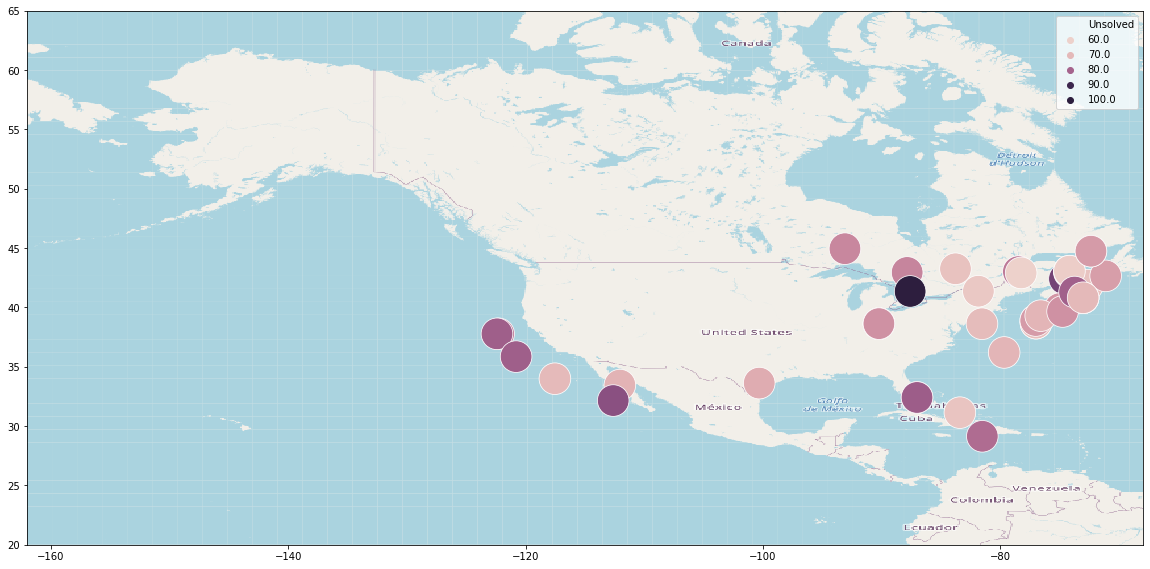

In [239]:
fig, ax = plt.subplots(figsize = (20,10))
sns.scatterplot(longs, lats, zorder = 1, hue = top45_unsolved.Unsolved, s = 1000)
ax.set_ylim(20,65)
ax.set_xlim(-162,-68)
ax.imshow(image, zorder = 0, aspect = "equal",extent = (-162,-68, 20, 65))